# Hierarchial Clustering

## Import Libraries & DataSets

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  
from sklearn.preprocessing import StandardScaler

In [2]:
customer_data = pd.read_csv('shopping_data.csv')  

In [3]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
# we are taking columns Annula income and spending scores only
data = customer_data[["Annual Income (k$)","Spending Score (1-100)"]]

In [6]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Standardizing the data

In [7]:
sc_X = StandardScaler()
data_stand = sc_X.fit_transform(data)
data_stand = sc_X.transform(data)

C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
data_stand

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## Run Dendogram based hierarchial clustering

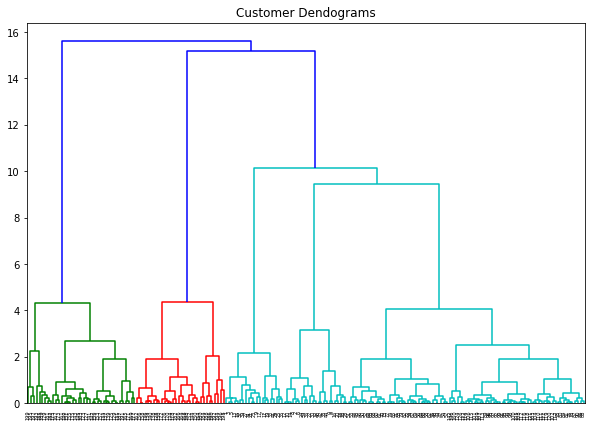

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data_stand, method='ward'))  

## Predict the clusters for the observations 

In [10]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
group=cluster.fit_predict(data_stand)  

## Plot the clusters

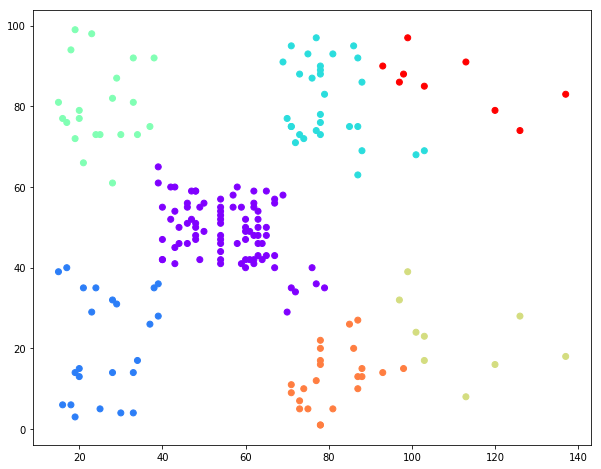

In [11]:
plt.figure(figsize=(10, 8))  
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=cluster.labels_, cmap='rainbow')  

In [12]:
group

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 5, 2, 5, 2,
       0, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2, 0, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 0, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 6, 4, 6, 5, 6, 4, 6, 4, 2, 4, 6, 4, 2, 4, 6, 4, 6, 4, 6,
       4, 6], dtype=int64)

# Merging the data with their cluster

In [13]:
customer_data['group']=group

In [14]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1


In [15]:
customer_data[group==0].count()

CustomerID                85
Genre                     85
Age                       85
Annual Income (k$)        85
Spending Score (1-100)    85
group                     85
dtype: int64

In [16]:
customer_data[group==1].count()

CustomerID                23
Genre                     23
Age                       23
Annual Income (k$)        23
Spending Score (1-100)    23
group                     23
dtype: int64

In [17]:
customer_data[group==2].count()

CustomerID                30
Genre                     30
Age                       30
Annual Income (k$)        30
Spending Score (1-100)    30
group                     30
dtype: int64

In [18]:
customer_data[group==3].count()

CustomerID                21
Genre                     21
Age                       21
Annual Income (k$)        21
Spending Score (1-100)    21
group                     21
dtype: int64

In [19]:
customer_data[group==4].count()

CustomerID                9
Genre                     9
Age                       9
Annual Income (k$)        9
Spending Score (1-100)    9
group                     9
dtype: int64

In [20]:
customer_data[group==5].count()

CustomerID                23
Genre                     23
Age                       23
Annual Income (k$)        23
Spending Score (1-100)    23
group                     23
dtype: int64

In [21]:
customer_data[group==6].count()

CustomerID                9
Genre                     9
Age                       9
Annual Income (k$)        9
Spending Score (1-100)    9
group                     9
dtype: int64

In [23]:
kmeans_mean_cluster = pd.DataFrame(round(customer_data.groupby('group').mean(),1))
kmeans_mean_cluster

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
group,,,,
0,87.9,42.5,55.8,49.1
1,23.0,45.2,26.3,20.9
2,153.6,32.6,79.6,81.0
3,22.0,25.3,25.1,80.0
4,190.8,40.4,111.0,22.8
5,156.7,41.2,81.0,12.8
6,190.0,33.0,109.6,85.9


#Cluster 0 > "Average income and average spending Score"
#Cluster 1 > "Low income and low spending score"
#Cluster 2 > "High icome high spending score"
##Cluster 3 > "Low income high spending score"
##Cluster 4 > "Very high income low spending score"
##Cluster 5 > "High income lowest spendig  score"
##Cluster 6 >  "very high income and highest spending score"

# Plotting the cluster

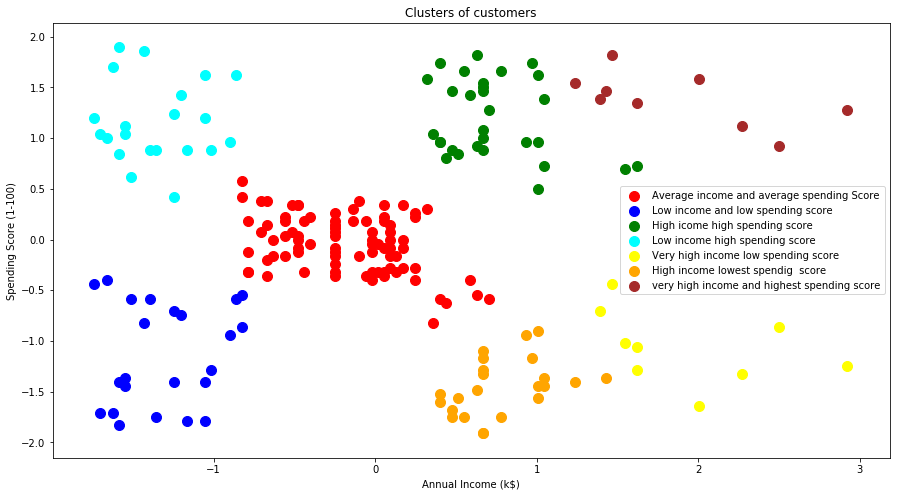

In [25]:
# Visualising the clusters
plt.figure(figsize=(15, 8))  
plt.scatter(data_stand[group == 0, 0], data_stand[group == 0, 1], s = 100, c = 'red', label = 'Average income and average spending Score')
plt.scatter(data_stand[group == 1, 0], data_stand[group == 1, 1], s = 100, c = 'blue', label = 'Low income and low spending score')
plt.scatter(data_stand[group == 2, 0], data_stand[group == 2, 1], s = 100, c = 'green', label = 'High icome high spending score')
plt.scatter(data_stand[group == 3, 0], data_stand[group == 3, 1], s = 100, c = 'cyan', label = 'Low income high spending score')
plt.scatter(data_stand[group == 4, 0], data_stand[group == 4, 1], s = 100, c = 'yellow', label = 'Very high income low spending score')
plt.scatter(data_stand[group == 5, 0], data_stand[group == 5, 1], s = 100, c = 'orange', label = 'High income lowest spendig  score')
plt.scatter(data_stand[group == 6, 0], data_stand[group == 6, 1], s = 100, c = 'brown', label = 'very high income and highest spending score')
#plt.scatter(data_stand[y_hc == 7, 0], data_stand[y_hc == 7, 1], s = 100, c = 'black', label = 'Cluster 8')
#plt.scatter(data_stand[y_hc == 8, 0], data_stand[y_hc == 8, 1], s = 100, c = 'violet', label = 'Cluster 9')
#plt.scatter(data_stand[y_hc == 9, 0], data_stand[y_hc == 9, 1], s = 100, c = 'indigo', label = 'Cluster 10')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()